# Classification using Naive Bayes
### Author: Prof. Sandro Camargo <github.com/sandrocamargo>
### Data Mining Course <https://moodle.unipampa.edu.br/moodle/course/view.php?id=5213>
#### This script uses the basic concepts of KNN.
In this script, we used the iris dataset https://archive.ics.uci.edu/dataset/53/iris

Algorithm documentation: https://colab.research.google.com/github/Sandrocamargo/data-mining/blob/main/Python/md05_Classification_Bayes.ipynb

To open this notebook in your Google Colab environment, [click here](https://colab.research.google.com/github/Sandrocamargo/data-mining/blob/main/Python/md05_Classification_Bayes.ipynb).

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [ ]:
# Split the dataset into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9777777777777777

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


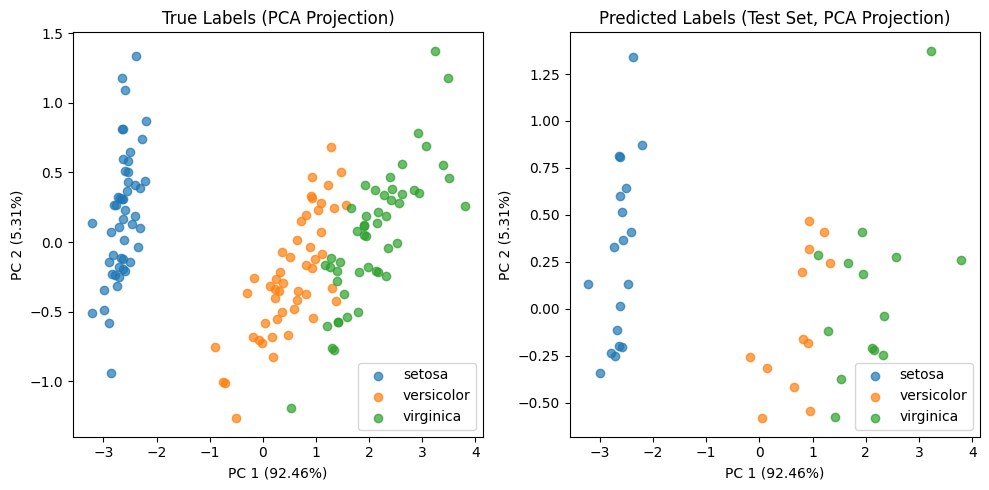

In [ ]:
# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA with true labels
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for i, target in enumerate(np.unique(y)):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1],
                label=target_names[i], alpha=0.7)
plt.title("True Labels (PCA Projection)")
plt.xlabel(f"PC 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.legend()

# Project test data for predicted labels
X_test_pca = pca.transform(X_test)

# Plot PCA with predicted labels
plt.subplot(1, 2, 2)
for i, target in enumerate(np.unique(y_pred)):
    plt.scatter(X_test_pca[y_pred == target, 0], X_test_pca[y_pred == target, 1],
                label=target_names[i], alpha=0.7)
plt.title("Predicted Labels (Test Set, PCA Projection)")
plt.xlabel(f"PC 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.legend()

plt.tight_layout()
plt.show()